# Ensembles

### Dataset: enron_spam_data_prep.csv. Link: https://github.com/MWiechmann/enron_spam_data.

### a) Train/test: 70%-30%. Use the approach below:
**- Random Forest: Use grid-search to adjust the number of base classifiers (values 10, 20, : : :, 180, 190, 200) and the maximum depth (max depth, values 2, 4, 6, 8 or maximum (None in sklearn)).**
</br>
**- cv = 10 folds**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = np.genfromtxt("../data/enron_spam_data_prep.csv", delimiter = ',')
data.shape

(33716, 1001)

In [3]:
x = data[:,:-1]
y = data[:,-1]

In [4]:
x.shape, y.shape

((33716, 1000), (33716,))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [7]:
est = [10*x for x in range(1,21)]

In [8]:
param_grid = { 
    'n_estimators': est,
    'max_depth' : [2,4,6,8],
}

In [9]:
rfc=RandomForestClassifier(random_state=42)

In [10]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10).fit(X_train_scaled, y_train)

In [11]:
CV_rfc.cv_results_

{'mean_fit_time': array([ 0.37955196,  0.56311142,  0.77510097,  0.99610362,  1.21351883,
         1.42444944,  1.65370135,  1.87309935,  2.10011725,  2.3106081 ,
         2.541695  ,  2.75510809,  2.9779254 ,  3.19855108,  3.40929835,
         3.6314039 ,  3.84043336,  4.0651408 ,  4.29718087,  4.52073946,
         0.54393878,  0.94046664,  1.34442415,  1.75015125,  2.16890402,
         2.55502403,  2.97451873,  3.37502687,  3.79994743,  4.20918703,
         4.6166419 ,  5.01495786,  5.43794677,  5.84241283,  6.22679558,
         6.67028534,  7.06224775,  7.49734898,  7.90347517,  8.32608869,
         0.70482492,  1.2810972 ,  1.87509615,  2.45422285,  3.02633753,
         3.59858255,  4.19381971,  4.75977283,  5.33817289,  5.93204443,
         6.52114036,  7.0945915 ,  7.68321927,  8.2600435 ,  8.86863031,
         9.43949454, 10.00039527, 10.55480533, 11.1715029 , 11.76091285,
         0.87850361,  1.60714443,  2.34264414,  3.08456881,  3.81896155,
         4.57650208,  5.30697384, 

In [12]:
CV_rfc.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [13]:
CV_rfc.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]})>

In [14]:
# Training model with best parameters:
rfc = RandomForestClassifier(max_depth= 8, n_estimators= 200, random_state=42).fit(X_train_scaled,y_train)

In [15]:
# Accuracy for training dataset:
rfc.score(X_train_scaled,y_train)

0.9155544256599296

### b) For each model, report the selected hyperparameters and the accuracy, recall, precision and F1-score metrics in the test data. Also plot the ROC curve and the Precision-Recall curve for each optimized model.

In [16]:
# Accuracy for test dataset:
pred = rfc.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9117152743450321

In [17]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      4945
         1.0       0.85      1.00      0.92      5170

    accuracy                           0.91     10115
   macro avg       0.93      0.91      0.91     10115
weighted avg       0.92      0.91      0.91     10115



In [18]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)>

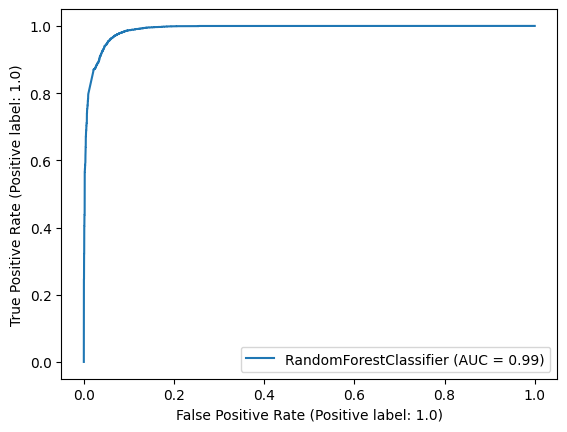

In [19]:
# ROC curve
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test_scaled, y_test, ax=ax)

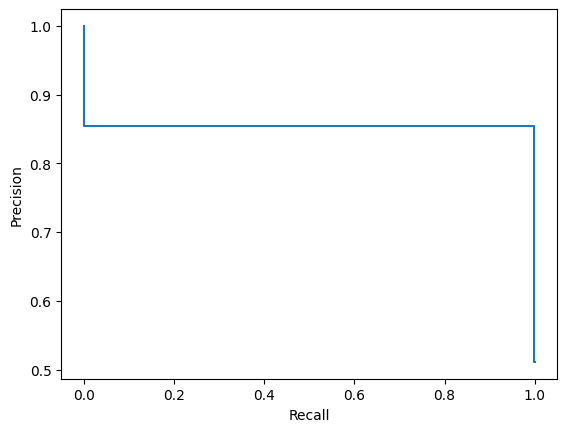

In [20]:
# Precision Recall
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()